<a href="https://colab.research.google.com/github/tarsisos/bootcamp_da/blob/main/methane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **#1 - Enviroment Project**

This is the first project from the 4th Data Analytics Bootcamp of [Data Viking](https://www.dataviking.com.br/).

Instructors:
- [Odemir Depieri Jr](https://br.linkedin.com/in/odemir-depieri-jr)
- [Ronisson Lucas](https://br.linkedin.com/in/ronisson-lucas-calmon-da-concei%C3%A7%C3%A3o-7aa884202)

Create a report with at least this infrmation:
1. Which countries are the biggest offenders in Methane emissions?
2. Which regions of the globe produce the most Methane emissions?
3. What is the reason for Methane emisison?

**Data description**:
1. **region** - Continent;
2. **country** - Country of emission;
3. **emissions** - Methane emission in kt;
4. **type** - Sector where emissions occur;
5. **segment** - Subsetcor where emissions occur;
6. **reason** - The motive of emission;
7. **baseYear** - Base year for tracking emissions;
8. **notes** - Data source.

In [ ]:
# IMPORTING LIBRARIES

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## *Macro analisys*

In [ ]:
# Reading data
methane = pd.read_csv("Methane_final.csv")

# verifying
methane.shape

(1548, 9)

In [ ]:
# Seeing firsts registries
methane.head()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


In [ ]:
# Information about the dataset
methane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1548 non-null   int64  
 1   region      1548 non-null   object 
 2   country     1548 non-null   object 
 3   emissions   1548 non-null   float64
 4   type        1548 non-null   object 
 5   segment     1548 non-null   object 
 6   reason      1548 non-null   object 
 7   baseYear    1548 non-null   object 
 8   notes       1548 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 109.0+ KB


In [ ]:
# Verifying if existis null values
methane.isnull().sum()

Unnamed: 0    0
region        0
country       0
emissions     0
type          0
segment       0
reason        0
baseYear      0
notes         0
dtype: int64

In [ ]:
# Statistical analisys of numerical columns
methane.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1548.0,773.500000,447.013423,0.000000,386.750000,773.500000,1160.250000,1547.000000
emissions,1548.0,643.255972,5566.238201,0.000459,2.659361,24.064669,128.419594,141953.765625


In [ ]:
# Statistical analisys of all dataset
methane.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1548.0,NaN,NaN,NaN,773.5,447.013423,0.0,386.75,773.5,1160.25,1547.0
region,1548,9,Africa,406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,1548,105,World,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emissions,1548.0,NaN,NaN,NaN,643.255972,5566.238201,0.000459,2.659361,24.064669,128.419594,141953.765625
type,1548,4,Energy,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
segment,1548,12,Total,414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reason,1548,4,All,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN
baseYear,1548,2,2022,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
notes,1548,3,Not available,877,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Identifying unique values
methane.nunique()

Unnamed: 0    1548
region           9
country        105
emissions     1531
type             4
segment         12
reason           4
baseYear         2
notes            3
dtype: int64

In [ ]:
# Remove column 'Unnamed: 0' and applying change to dataset
methane.drop( columns=['Unnamed: 0'], inplace=True )
methane.head()

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


In [ ]:
type(methane)

pandas.core.frame.DataFrame

## *Exploratory Data Analisys*

### *Understanding the columns values*

In [ ]:
# See columns
methane.columns

Index(['region', 'country', 'emissions', 'type', 'segment', 'reason',
       'baseYear', 'notes'],
      dtype='object')

In [ ]:
# Inspecting columns values
methane['region'].value_counts()

Africa                       406
Europe                       302
Asia Pacific                 270
Middle East                  187
Central and South America    183
Russia & Caspian              96
North America                 61
World                         22
Other                         21
Name: region, dtype: int64

In [ ]:
methane['country'].value_counts()

World                       22
Iran                        22
European Union              22
Russia                      22
Kazakhstan                  22
                            ..
Central African Republic     3
Liberia                      3
Sierra Leone                 3
Seychelles                   3
Gambia                       3
Name: country, Length: 105, dtype: int64

In [ ]:
methane['emissions'].value_counts()

0.004000        5
0.132000        3
0.020000        2
29.507999       2
0.028000        2
               ..
10.448000       1
271.931000      1
20.071501       1
49.858101       1
70758.710938    1
Name: emissions, Length: 1531, dtype: int64

In [ ]:
methane['type'].value_counts()

Energy         1233
Agriculture     105
Other           105
Waste           105
Name: type, dtype: int64

In [ ]:
methane['segment'].value_counts()

Total                                             414
Onshore oil                                       217
Gas pipelines and LNG facilities                  164
Offshore oil                                      159
Onshore gas                                       144
Offshore gas                                      118
Other from oil and gas                             98
Bioenergy                                          93
Other from coal                                    66
Steam coal                                         30
Coking coal                                        24
Satellite-detected large oil and gas emissions     21
Name: segment, dtype: int64

In [ ]:
methane['reason'].value_counts()

All         746
Fugitive    342
Vented      342
Flared      118
Name: reason, dtype: int64

In [ ]:
methane['baseYear'].value_counts()

2022         1233
2019-2021     315
Name: baseYear, dtype: int64

In [ ]:
methane['notes'].value_counts()

Not available                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

### *Graphical analisys*

#### Frequency of emissions

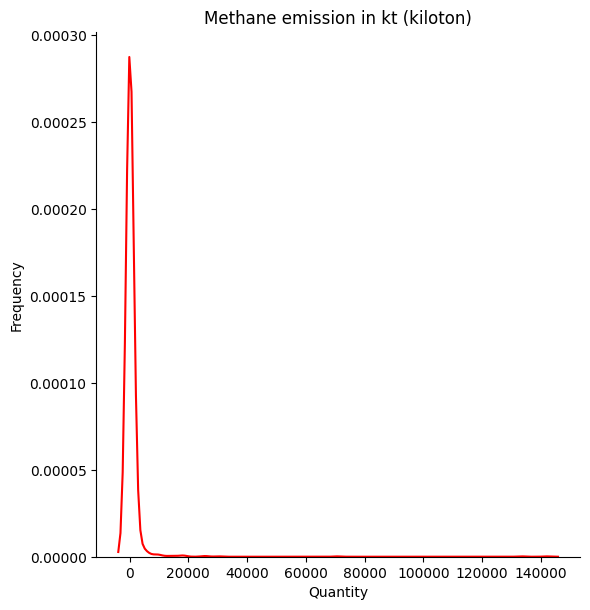

In [ ]:
# Frequency of emissions

# Graphic
sns.displot(
    data = methane,
    x ='emissions',
    kind='kde',
    height=6,
    color='red'
)

# Graphic title
plt.title('Methane emission in kt (kiloton)')

# Graphic axis title
plt.xlabel('Quantity')
plt.ylabel('Frequency');

In [ ]:
# Total emission

Total_Emission = round(methane['emissions'].sum(), 2)

print(f'Total emission of Methane Gas on Atmosphere: {Total_Emission} kt')

Total emission of Methane Gas on Atmosphere: 995760.25 kt


#### Country offenders

In [ ]:
# Top countries offenders
Country_Offenders = methane.groupby( by= ['country'])['emissions'].sum().sort_values(ascending = False).head(13)


In [ ]:
Country_Offenders

country
World             489152.316956
China              81048.371586
United States      48604.877296
Russia             42432.929804
India              34852.007386
Brazil             21720.838126
Indonesia          19404.469000
European Union     18985.173461
Other              15997.357175
Iran               13030.685366
Nigeria             9903.895667
Turkmenistan        9834.398293
Pakistan            8170.627576
Name: emissions, dtype: float64

In [ ]:
# Removing regions and leaving countries
Country_Offenders.drop(labels=['World', 'European Union', 'Other'], inplace=True)

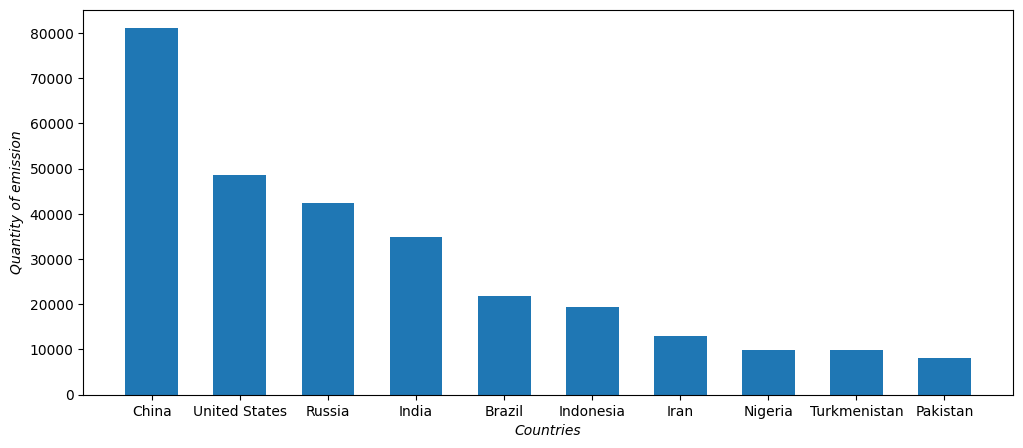

In [ ]:
# Figure size
plt.figure(figsize=(12,5))

# Labels configurations
style = 'italic'
size = 10

# Plot graph
plt.bar(Country_Offenders.index, Country_Offenders.values, width=0.6,)
plt.xlabel('Countries', fontstyle = style, fontsize = size)
plt.ylabel('Quantity of emission', fontstyle = style, fontsize = size)

plt.show()

#### Type of emissions

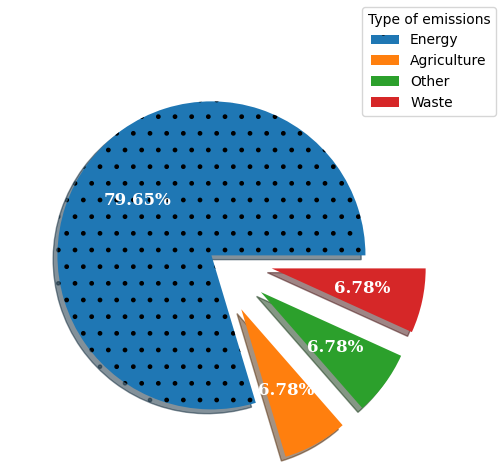

In [ ]:
# Set imgage size
fig = plt.figure(figsize=(5,5))

# Font dictionary configuration
font = {'family': 'serif',
        'color':  'white',
        'weight': 'bold',
        'size': 12,
        }

# Create pie chart
plt.pie(
    data = methane, 
    x = methane['type'].value_counts(), 
    labels = methane['type'].value_counts().index,
    autopct = '%.2f%%', # Format as percentage with 2 decimals cases
    shadow = True,
    explode = (0,0.4,0.4,0.4), # Split each part
    hatch = ['.','','',''], # 
    textprops = dict(font),
)

# Show legend
fig.legend(
    title = "Type of emissions",
    loc = "upper right"
)

plt.show()

[EN] It is observed that energy is the sector that appears most frequently as a Methane emitter.

[PT-BR] Observa-se que 'Energia' é o setor que aparece com mais frequência como emissor de Metano.

##### Type of emssions by quantity of emssion

In [ ]:
# Counting how much emission each sector emits

sector = methane['type'].value_counts()
emission = methane.groupby(by=['type'])['emissions'].sum().sort_values(ascending = False)

sector, emission

(Energy         1233
 Agriculture     105
 Other           105
 Waste           105
 Name: type, dtype: int64,
 type
 Energy         537396.311526
 Agriculture    292758.868769
 Waste          145838.417946
 Other           19766.646886
 Name: emissions, dtype: float64)

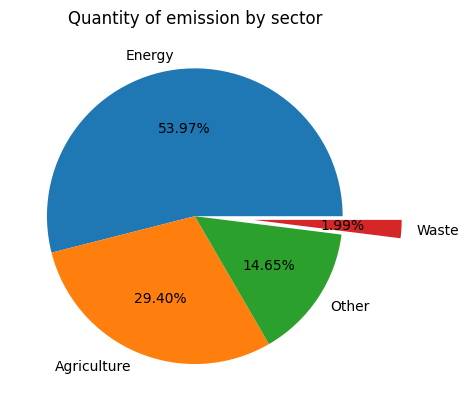

In [ ]:
plt.title('Quantity of emission by sector')
plt.pie(
    data = methane,
    x = emission,
    labels = sector.index,
    autopct = '%.2f%%',
    explode = (0,0,0,0.4)
)

plt.show()

[EN] Energy sector concentrates 53.97% of Methane emissions.

[PT-BR] O setor de Energia concentra 53.97% das emissões de Metano.

#### Emission by regions

In [ ]:
methane['region'].value_counts()

Africa                       406
Europe                       302
Asia Pacific                 270
Middle East                  187
Central and South America    183
Russia & Caspian              96
North America                 61
World                         22
Other                         21
Name: region, dtype: int64

In [ ]:
# Filtering region without 'World'
Emission_Region = methane.loc[methane['region'] != 'World']
Emission_Region['region'].value_counts()

Africa                       406
Europe                       302
Asia Pacific                 270
Middle East                  187
Central and South America    183
Russia & Caspian              96
North America                 61
Other                         21
Name: region, dtype: int64

In [ ]:
Emission_Region

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
...,...,...,...,...,...,...,...,...
1521,Russia & Caspian,Uzbekistan,16.973917,Energy,Other from oil and gas,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1522,Russia & Caspian,Uzbekistan,18.299999,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1523,Russia & Caspian,Uzbekistan,780.916138,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1524,Russia & Caspian,Uzbekistan,3.845616,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [ ]:
# Grouping region by quantity of emission
Emission_Region_Qty = Emission_Region.groupby(by= ['region'])['emissions'].sum().sort_values(ascending= False)
Emission_Region_Qty

region
Asia Pacific                 177699.611465
North America                 63347.409177
Russia & Caspian              62421.612360
Africa                        54197.152613
Europe                        49208.996818
Central and South America     45639.989799
Middle East                   38095.798763
Other                         15997.357175
Name: emissions, dtype: float64

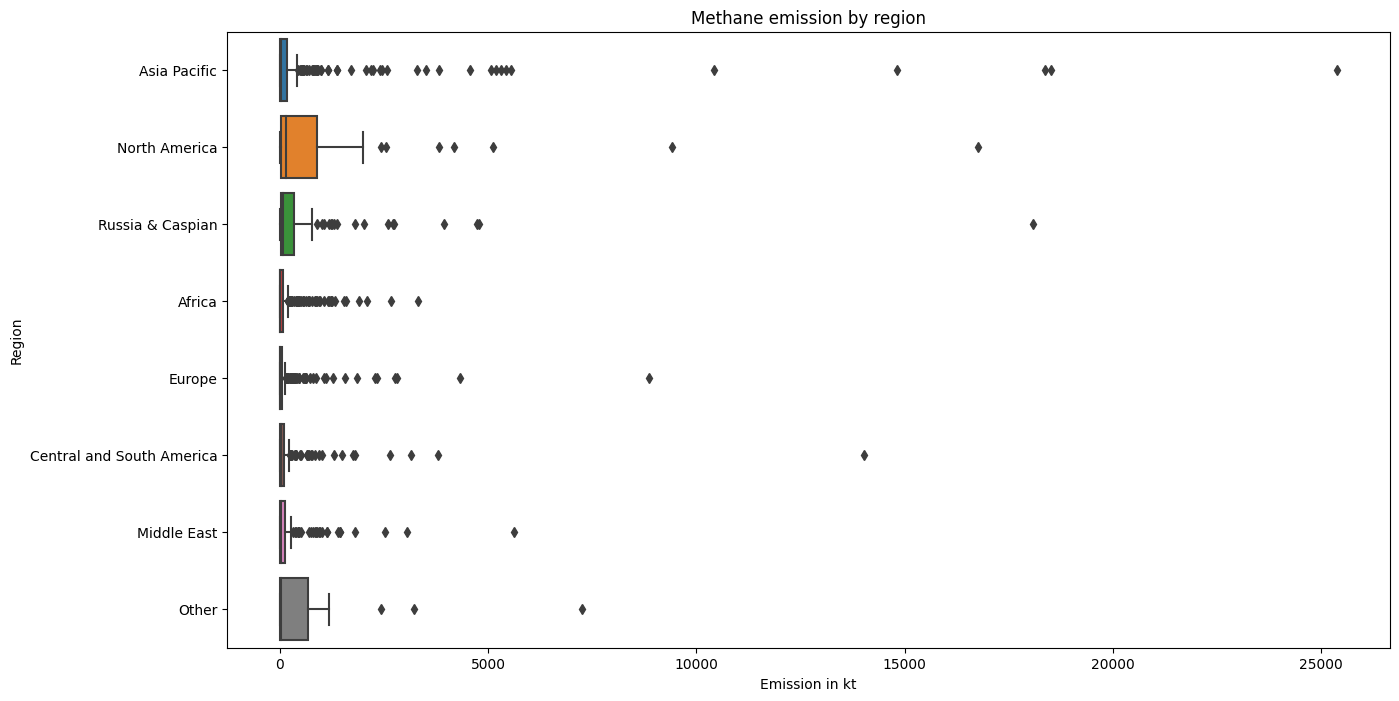

In [ ]:
fig = plt.figure(figsize=(15,8))

sns.boxplot(data=Emission_Region, x = 'emissions', y = 'region', order=Emission_Region_Qty.index )

plt.title('Methane emission by region')
plt.xlabel('Emission in kt')
plt.ylabel('Region')

plt.show()

#### Reason of emission

In [ ]:
methane['reason'].value_counts()

All         746
Fugitive    342
Vented      342
Flared      118
Name: reason, dtype: int64

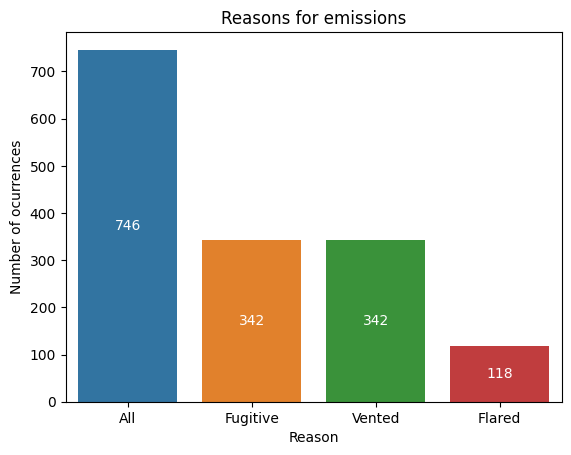

In [ ]:
reason = sns.countplot(data=methane, x = 'reason')
for r in reason.containers:
  reason.bar_label(r, label_type='center', color = 'white')

plt.title('Reasons for emissions')
reason.set_xlabel('Reason')
reason.set_ylabel('Number of ocurrences');

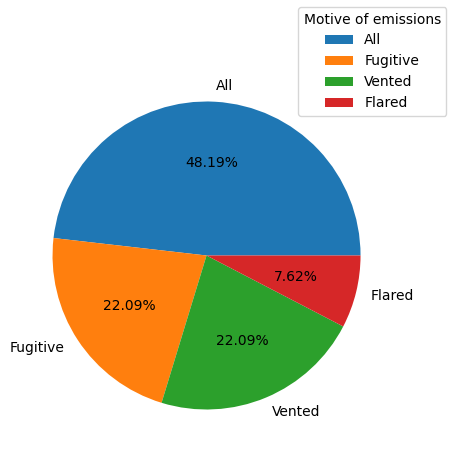

In [ ]:
fig = plt.figure(figsize=(5,5))

plt.pie(
    data = methane, 
    x = methane['reason'].value_counts(), 
    labels = methane['reason'].value_counts().index,
    autopct = '%.2f%%',
)

fig.legend(
    title = "Motive of emissions",
    loc = "upper right"
)

plt.show()

## Final Report

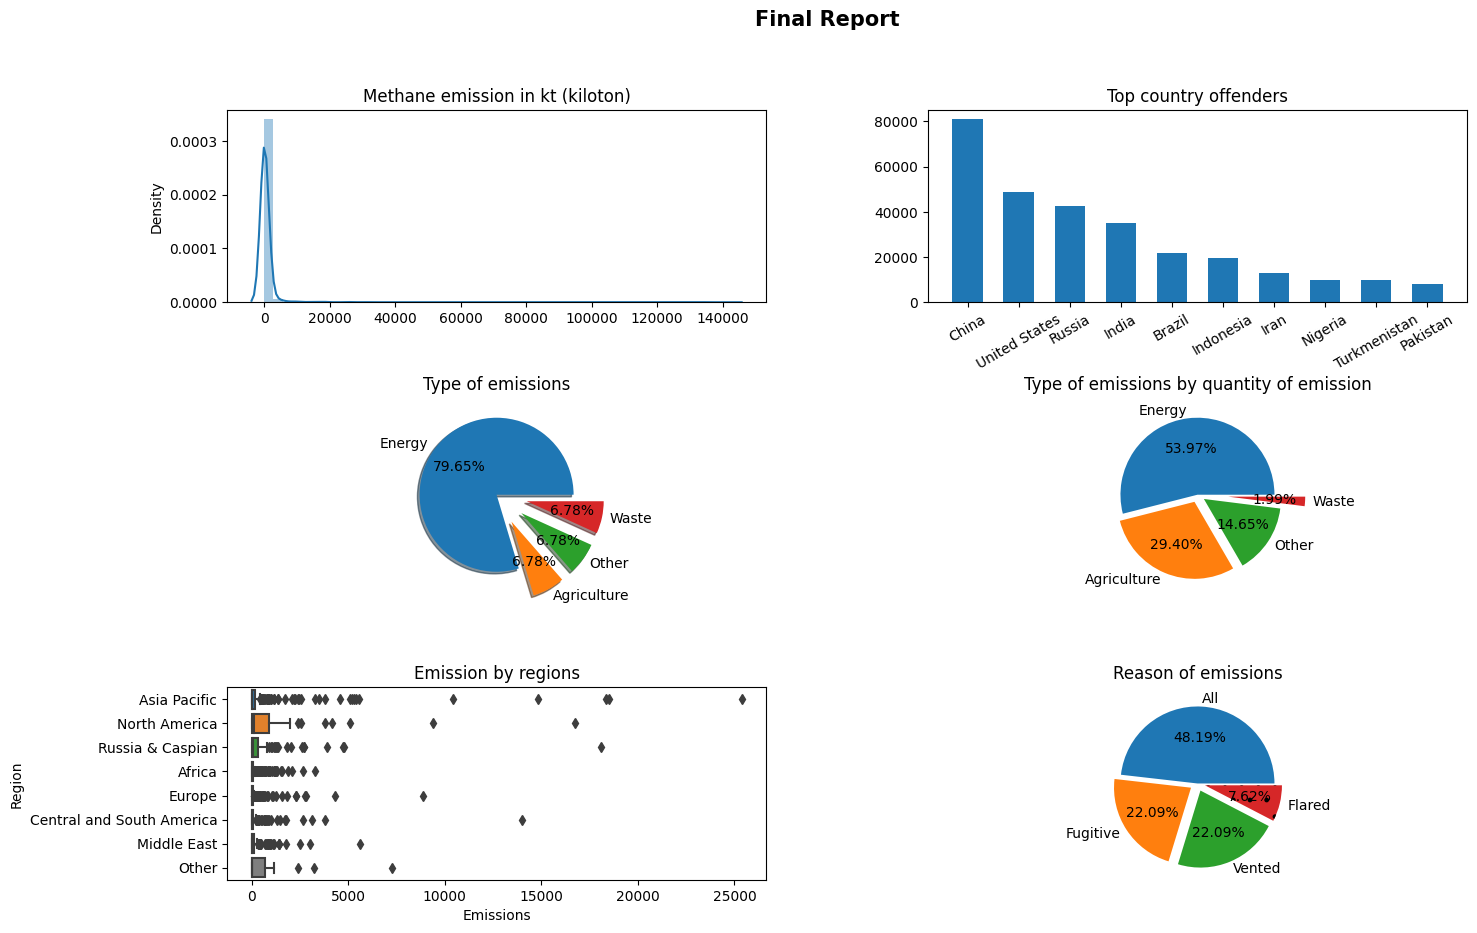

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(16,10))
plt.suptitle('Final Report', fontsize = 15, fontweight = 'bold' )

ax[0,0].set_title('Methane emission in kt (kiloton)')
sns.distplot(ax= ax[0,0], x=methane['emissions'])

ax[0,1].set_title('Top country offenders')
ax[0,1].bar(Country_Offenders.index, Country_Offenders.values, width=0.6)
ax[0,1].set_xticklabels(labels= Country_Offenders.index, rotation = 30);

ax[1,0].set_title('Type of emissions')
ax[1,0].pie(
    data = methane, 
    x = methane['type'].value_counts(), 
    labels = methane['type'].value_counts().index,
    autopct = '%.2f%%',
    shadow = True,
    explode = (0,0.4,0.4,0.4),
)

ax[1,1].set_title('Type of emissions by quantity of emission')
ax[1,1].pie(
    data = methane,
    x = emission,
    labels = sector.index,
    autopct = '%.2f%%',
    explode = (0,0.1,0.1,0.4)
)

ax[2,0].set_title('Emission by regions')
sns.boxplot(ax=ax[2,0],
            data=Emission_Region,
            x = 'emissions',
            y = 'region',
            order=Emission_Region_Qty.index )
ax[2,0].set_xlabel('Emissions')
ax[2,0].set_ylabel('Region')

ax[2,1].set_title('Reason of emissions')
ax[2,1].pie(
    data = methane, 
    x = methane['reason'].value_counts(), 
    labels = methane['reason'].value_counts().index,
    autopct = '%.2f%%',
    explode = (0,0.1,0.1,0.1),
    hatch = ['','','','.'],
)

plt.subplots_adjust(wspace=0.3, hspace=0.5)

In [ ]:
# Saving figure to the file area
fig.savefig('environment_report.jpg')